# Visual story telling part 1: green buildings

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels as sm
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

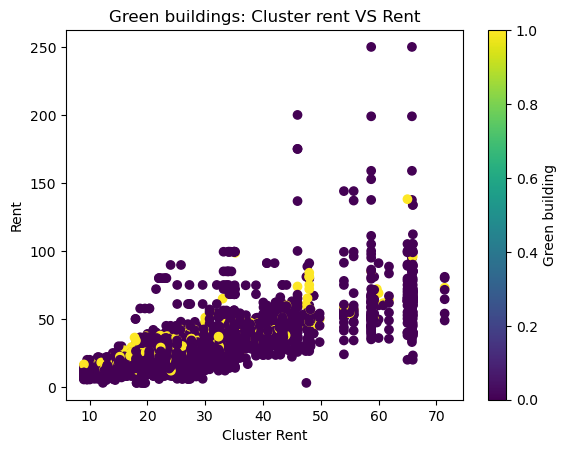

In [3]:
# read greenbuildings file
data_raw = pd.read_csv('greenbuildings.csv')
data_raw.head()

# Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

# A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

# Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

# Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

# You should submit your report as a Jupyter notebook. Your notebook should include code for any data pre-processing, analysis, and visualization that you do. You should also include a brief written summary of your findings, including any interesting visualizations that you produce. You should also include a brief discussion of any limitations of your analysis, and any suggestions you have for future data collection or analysis that might help to improve the results.

# code here

plt.figure()
plt.scatter(data_raw['cluster_rent'], data_raw['Rent'], c=data_raw['green_rating'])
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Green buildings: Cluster rent VS Rent')
plt.colorbar(label='Green building')
plt.show()



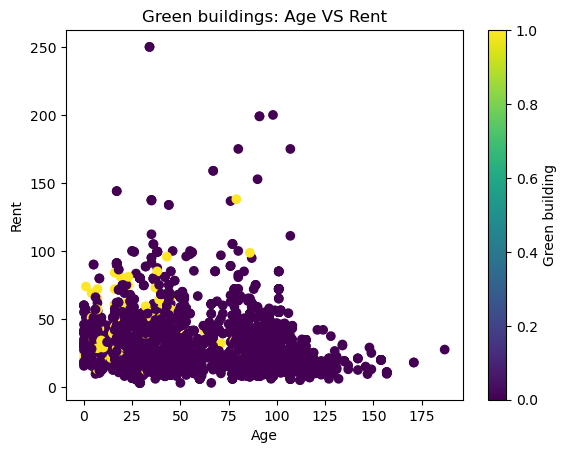

In [4]:
plt.figure()
plt.scatter(data_raw['age'], data_raw['Rent'], c=data_raw['green_rating'])
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Green buildings: Age VS Rent')
plt.colorbar(label='Green building')
plt.show()

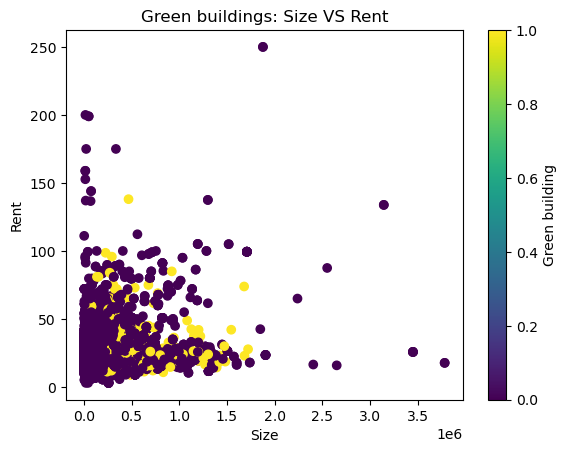

In [5]:
plt.figure()
plt.scatter(data_raw['size'], data_raw['Rent'], c=data_raw['green_rating'])
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Green buildings: Size VS Rent')
plt.colorbar(label='Green building')
plt.show()

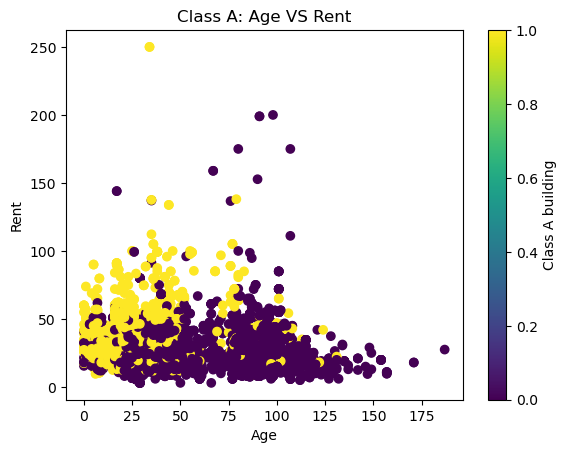

In [6]:
plt.figure()
plt.scatter(data_raw['age'], data_raw['Rent'], c=data_raw['class_a'])
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Class A: Age VS Rent')
plt.colorbar(label='Class A building')
plt.show()

* Rent is correlated with the cluster rent
* Rent is correlated with the size, as expected
* Most of the class A buildings are also younger 
* Age does not have a high correlation with rent 
* Class a buildings get higher rent as they are premium buildings 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


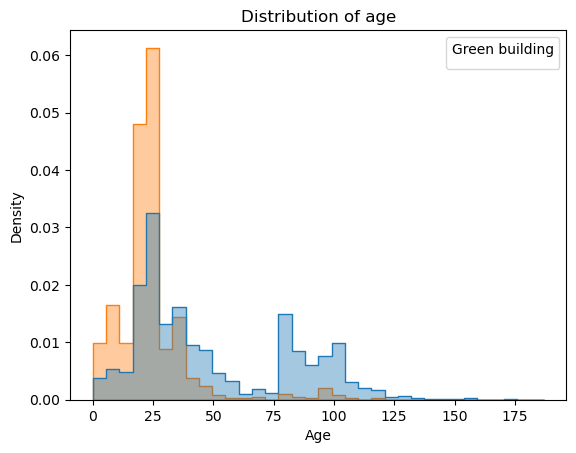

In [7]:
# Plot 1 - Density Plot
plt.figure()
sns.histplot(data_raw, x='age', hue='green_rating', element='step', stat='density', common_norm=False, alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of age')
plt.legend(title='Green building')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


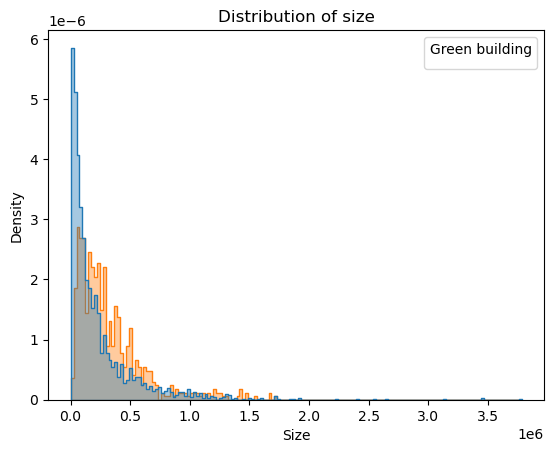

In [8]:
# Plot 3 - Density Plot
plt.figure()
sns.histplot(data_raw, x='size', hue='green_rating', element='step', stat='density', common_norm=False, alpha=0.4)
plt.xlabel('Size')
plt.ylabel('Density')
plt.title('Distribution of size')
plt.legend(title='Green building')
plt.show()

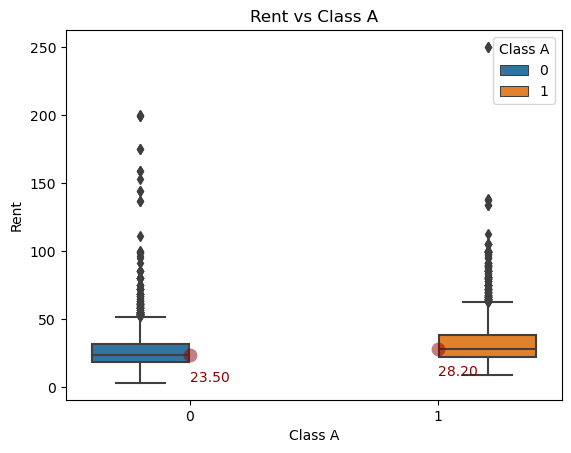

In [9]:
# Plot 4 - Box Plot with Median Points
plt.figure()
medians = data_raw.groupby('class_a')['Rent'].median().reset_index()
sns.boxplot(data=data_raw, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', size=10, alpha=0.5)
for index, row in medians.iterrows():
    plt.text(row['class_a'], row['Rent'] - 20, f'{row["Rent"]:.2f}', color='darkred')
plt.xlabel('Class A')
plt.ylabel('Rent')
plt.title('Rent vs Class A')
plt.legend(title='Class A')
plt.show()

* Most of the green buildings are younger than non-green buildings 
* The proportion of class a buildings is higher in green buildings 
* The proportion of green and non-green building increases as the size of buildings increases
* The is a significant difference in the of rent of class a and non-class a buildings 

In [10]:
# Add 'age_cat' column
data_raw['age_cat'] = pd.cut(data_raw['age'], bins=[0] + list(range(10, 200, 10)), labels=False, right=False)

# Calculate medians
medians = data_raw.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
medians


,age_cat,green_rating,Rent
0,0,0,29.000
1,0,1,26.625
2,1,0,28.800
3,1,1,28.575
4,2,0,25.820
5,2,1,27.000
6,3,0,25.000
7,3,1,30.800
8,4,0,24.000
9,4,1,31.300


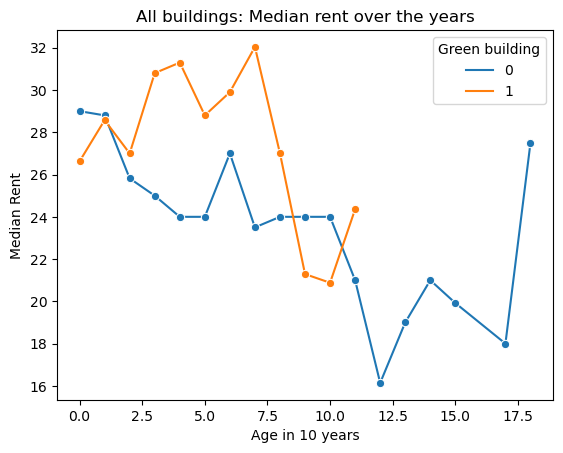

In [11]:
# Plot median rent over the years
plt.figure()
sns.lineplot(data=medians, x='age_cat', y='Rent', hue='green_rating', marker='o')
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('All buildings: Median rent over the years')
plt.legend(title='Green building')
plt.show()

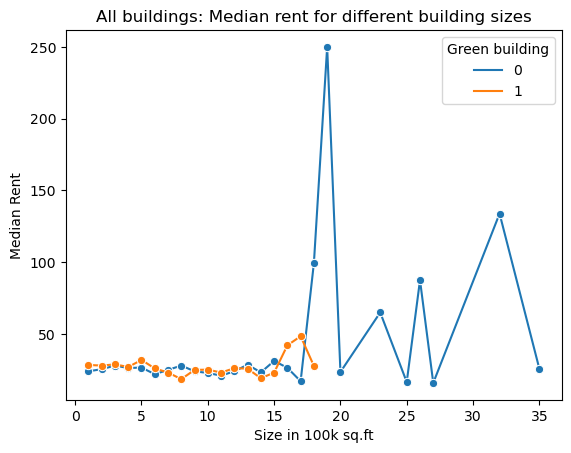

In [12]:
# Add 'size_cat' column
data_raw['size_cat'] = pd.cut(data_raw['size'], bins=[0] + list(range(10, 3781045, 100000)), labels=False, right=False)

# Calculate medians for different building sizes
medians = data_raw.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

# Plot median rent for different building sizes
plt.figure()
sns.lineplot(data=medians, x='size_cat', y='Rent', hue='green_rating', marker='o')
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('All buildings: Median rent for different building sizes')
plt.legend(title='Green building')
plt.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_9284\1353233380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0] + list(range(10, 200, 10)), labels=False, right=False)


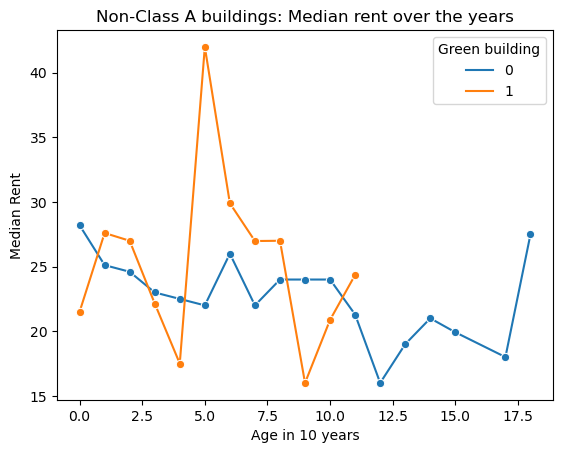

In [13]:
# Subset data for non-class A buildings
data_non_class_a = data_raw[data_raw['class_a'] != 1]

# Add 'age_cat' column for non-class A buildings
data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0] + list(range(10, 200, 10)), labels=False, right=False)

# Calculate medians for non-class A buildings
medians_non_class_a = data_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

# Plot median rent over the years for non-class A buildings
plt.figure()
sns.lineplot(data=medians_non_class_a, x='age_cat', y='Rent', hue='green_rating', marker='o')
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('Non-Class A buildings: Median rent over the years')
plt.legend(title='Green building')
plt.show()

C:\Users\Amey\AppData\Local\Temp\ipykernel_9284\3715485233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0] + list(range(10, 3781045, 100000)), labels=False, right=False)


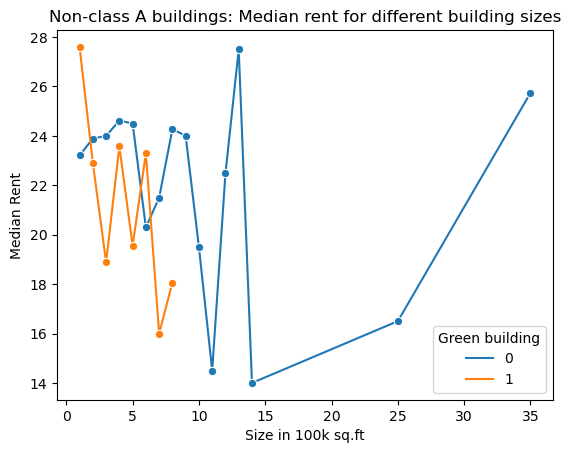

In [14]:
# Add 'size_cat' column for non-class A buildings
data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0] + list(range(10, 3781045, 100000)), labels=False, right=False)

# Calculate medians for different building sizes for non-class A buildings
medians_non_class_a = data_non_class_a.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

# Plot median rent for different building sizes for non-class A buildings
plt.figure()
sns.lineplot(data=medians_non_class_a, x='size_cat', y='Rent', hue='green_rating', marker='o')
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('Non-class A buildings: Median rent for different building sizes')
plt.legend(title='Green building')
plt.show()



Observations

For a size of 250,000 sqft, the green buildings have a higher rent when it is a class a building
The rent of green buildings is lower than non-green ones when they are not class a buildings
The rent difference is not uniform across different sizes and ages

In [15]:
# Subset data for class A buildings with size between 200k and 300k sq.ft
data_size = data_raw[(data_raw['size'] > 200000) & (data_raw['size'] < 300000)]
data_size = data_size[data_size['class_a'] == 1]

# Calculate and print median leasing rate for class A buildings
median_leasing_rate = data_size['leasing_rate'].median()
print(f"Median leasing rate for class A buildings of sizes ranging from 200k to 300k sq.ft: {median_leasing_rate}")

# Calculate medians for age categories and green ratings for class A buildings
medians = data_size.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
medians_1 = medians[medians['green_rating'] == 1].head(5)
rent_1 = medians_1['Rent']
medians_0 = medians[medians['green_rating'] == 0].head(5)
rent_0 = medians_0['Rent']

# Calculate and print difference in rent for the first 5 years for class A buildings
difference_in_rent_class_a = (sum(rent_1.dropna()) - sum(rent_0.dropna())) / 5
print(f"Difference in rent for the first 5 years class A buildings: {difference_in_rent_class_a}")

# Subset data for non-class A buildings with size between 200k and 300k sq.ft
data_size_class = data_raw[(data_raw['size'] > 200000) & (data_raw['size'] < 300000)]
data_size_class = data_size_class[data_size_class['class_a'] != 1]

# Calculate medians for age categories and green ratings for non-class A buildings
medians_class = data_size_class.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
medians_1_class = medians_class[medians_class['green_rating'] == 1].head(5)
rent_1_class = medians_1_class['Rent']
medians_0_class = medians_class[medians_class['green_rating'] == 0].head(5)
rent_0_class = medians_0_class['Rent']

# Calculate and print difference in rent for the first 5 years for non-class A buildings
difference_in_rent_non_class_a = (sum(rent_1_class.dropna()) - sum(rent_0_class.dropna())) / 5
print(f"Difference in rent for the first 5 years for non-class A buildings: {difference_in_rent_non_class_a}")

Median leasing rate for class A buildings of sizes ranging from 200k to 300k sq.ft: 91.605
Difference in rent for the first 5 years class A buildings: 3.096999999999997
Difference in rent for the first 5 years for non-class A buildings: -2.4180000000000006


In [16]:
answer = 5000000/(difference_in_rent_class_a * 250000 * 0.916)
answer

7.050068174159251

**Final recommendation** 

* If the building is not a Class-A building, it is not wise to invest in a green building since the average returns for 5 years are negative
* The builder should invest in a Class-A green building to yield positive returns
* We can expect a occupancy rate of 91.6% on such buildings 
* The average difference in rent for green and non-green buildings that are class a and whose sizes ranging from 200k to 300k is 3.097
* Hence, for a 250k sq.ft building at 91.6% occupancy, we expect to recuperate the costs in 7.05 years